# Task 2 – Exploratory Data Analysis (EDA)
Internship: CodeAlpha – Data Analytics  
Dataset: Amazon Electronics Reviews (sample)
In this task, I perform Exploratory Data Analysis (EDA) on an electronics reviews dataset.  
The goal is to understand the structure of the data, identify trends and patterns, test a few hypotheses, and detect potential data issues that may affect further modelling or sentiment analysis, which will be done in Task 4.


 Objectives 
This EDA focuses on:
- **Asking meaningful questions** about the dataset before analysis.  
- **Explore the data structure**, including variables and data types.  
- **Identify trends, patterns and anomalies** within the data.  
- **Test hypotheses and validate assumptions** using statistics and visualization.  
- **Detect potential data issues or problems** to address in further analysis.  
- Build a small portfolio of **clear, well-designed visualizations**.


# Key Questions for EDA

1. What is the **distribution of product ratings** (1–5 stars)?
2. Do **review lengths** differ across ratings? (Are unhappy customers writing longer reviews?)
3. Do **helpful votes** vary by rating? (Do extreme ratings get more votes?)
4. How have the **number of reviews** and **average rating** changed over time?
5. What are the **most common words** used in review texts?
6. Are there any **data quality issues** (missing values, duplicates, extreme outliers)?


In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("C:\\Users\\Nyla Majid\\OneDrive\\Documents\\Datasets\\electronics_sample.csv")
df.head()

,overall,vote,reviewTime,reviewText,summary
0,2,0,2010-02-10,Tech support is the worst,1265760000
1,2,0,2016-10-24,Screws were missing from the bracket and beaut...,Spend a little more and get much better.
2,1,0,2017-07-10,Trouble connecting and staying connected via b...,1499644800
3,4,5,2013-05-02,I purchased this unit for our RV to replace an...,Receiver Offers a Lot of Flexibility & Complexity
4,3,0,2013-01-04,It works. Nuff said but the review requires 1...,It's a cable


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19809 entries, 0 to 19808
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   overall     19809 non-null  int64 
 1   vote        19809 non-null  int64 
 2   reviewTime  19809 non-null  object
 3   reviewText  19808 non-null  object
 4   summary     19809 non-null  object
dtypes: int64(2), object(3)
memory usage: 773.9+ KB


In [77]:
df.shape

(19809, 5)

In [78]:
df['reviewTime']=pd.to_datetime(df['reviewTime'])
df['vote'] = pd.to_numeric(df['vote'], errors='coerce')
df['vote'] = df['vote'].fillna(0)


In [79]:
df.dtypes

overall                int64
vote                   int64
reviewTime    datetime64[ns]
reviewText            object
summary               object
dtype: object

In [80]:
df.describe(include='all')

,overall,vote,reviewTime,reviewText,summary
count,19809.000000,19809.000000,19809,19808,19809
unique,NaN,NaN,NaN,17608,11182
top,NaN,NaN,NaN,Five Stars,Five Stars
freq,NaN,NaN,NaN,371,531
mean,3.005149,2.210207,2014-02-17 14:32:19.845524992,NaN,NaN
min,1.000000,0.000000,2000-08-25 00:00:00,NaN,NaN
25%,2.000000,0.000000,2013-01-18 00:00:00,NaN,NaN
50%,3.000000,0.000000,2014-10-15 00:00:00,NaN,NaN
75%,4.000000,0.000000,2016-02-09 00:00:00,NaN,NaN
max,5.000000,838.000000,2018-09-24 00:00:00,NaN,NaN


In [81]:
df.isnull().sum()

overall       0
vote          0
reviewTime    0
reviewText    1
summary       0
dtype: int64

In [82]:
df['reviewText']=df['reviewText'].fillna("no review text")

In [83]:
df.isnull().sum()

overall       0
vote          0
reviewTime    0
reviewText    0
summary       0
dtype: int64

In [84]:
# Considering text + date as a duplicate definition
duplicate = df.duplicated(subset=['reviewText', 'summary', 'reviewTime']).sum()
print("Duplicates before:", duplicate)

Duplicates before: 8


In [85]:
df = df.drop_duplicates(subset=['reviewText', 'summary', 'reviewTime'])
dup_after = df.duplicated(subset=['reviewText', 'summary', 'reviewTime']).sum()
print("Duplicates after:", dup_after)

Duplicates after: 0


In [86]:
df.shape

(19801, 5)

In [87]:
# Length of review text and summary
df['review_length'] = df['reviewText'].str.len()

if 'summary' in df.columns:
    df['summary'] = df['summary'].astype(str)
    df['summary_length'] = df['summary'].str.len()
else:
    df['summary_length'] = np.nan
    # Time-based features
if 'reviewTime' in df.columns:
    df['review_year'] = df['reviewTime'].dt.year
    df['review_month'] = df['reviewTime'].dt.to_period('M').astype(str)
else:
    df['review_year'] = np.nan
    df['review_month'] = np.nan

# Ensure numeric types where needed
df['overall'] = pd.to_numeric(df['overall'], errors='coerce')
df['vote'] = pd.to_numeric(df['vote'], errors='coerce').fillna(0)
df.head()

,overall,vote,reviewTime,reviewText,summary,review_length,summary_length,review_year,review_month
0,2,0,2010-02-10,Tech support is the worst,1265760000,25,10,2010,2010-02
1,2,0,2016-10-24,Screws were missing from the bracket and beaut...,Spend a little more and get much better.,108,40,2016,2016-10
2,1,0,2017-07-10,Trouble connecting and staying connected via b...,1499644800,54,10,2017,2017-07
3,4,5,2013-05-02,I purchased this unit for our RV to replace an...,Receiver Offers a Lot of Flexibility & Complexity,976,49,2013,2013-05
4,3,0,2013-01-04,It works. Nuff said but the review requires 1...,It's a cable,116,12,2013,2013-01


### Data Quality & Cleaning Notes

- Converted `reviewTime` to proper datetime to allow time-based analysis.
- Filled missing `reviewText`  with "no review text".
- Removed reviews with empty `reviewText` and dropped rows with missing `overall` rating.
- Deduplicated reviews using a combination of `reviewText`, `summary`, and `reviewTime`.
- Created additional features:
  - `review_length` and `summary_length` (character counts).
  - `review_year` and `review_month` for time-based trends.

These steps address potential data issues such as missing values, duplicates and inconsistent types.


In [88]:
df['overall'].value_counts()

overall
5    4034
1    4019
4    3950
3    3922
2    3876
Name: count, dtype: int64

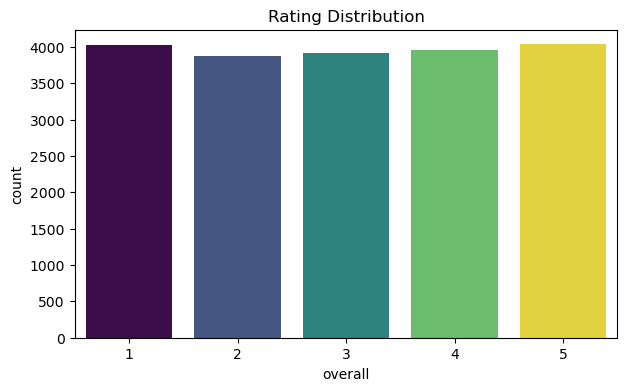

In [89]:
plt.figure(figsize=(7,4))
sns.countplot(data=df,hue='overall',x='overall', palette='viridis',legend=False)
plt.title("Rating Distribution")
plt.show()


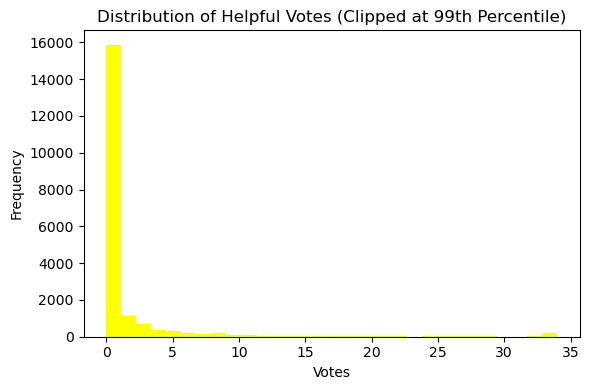

In [122]:
#Distribution of votes (clipped to reduce extreme outliers) ---
votes_clip = df['vote'].clip(upper=df['vote'].quantile(0.99))
plt.figure(figsize=(6,4))
plt.hist(votes_clip, bins=30,color='yellow')
plt.title('Distribution of Helpful Votes (Clipped at 99th Percentile)')
plt.xlabel('Votes')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [91]:
#word count 
df['review_length'] = df['reviewText'].astype(str).apply(len)
#df['review_length']
df['review_length'].describe()


count    19801.000000
mean       229.757841
std        499.468980
min          1.000000
25%         20.000000
50%         48.000000
75%        220.000000
max      11038.000000
Name: review_length, dtype: float64

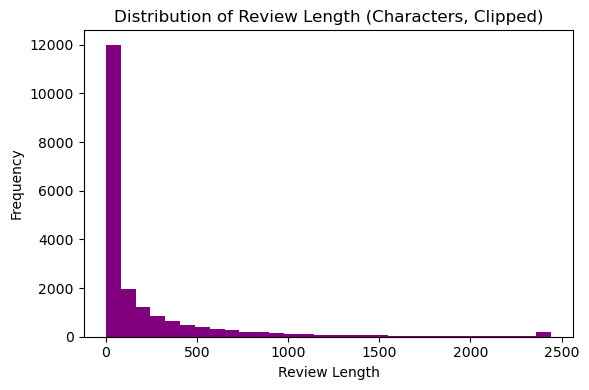

In [123]:
# --- 5.3 Distribution of review length ---
length_clip = df['review_length'].clip(upper=df['review_length'].quantile(0.99))

plt.figure(figsize=(6,4))
plt.hist(length_clip, bins=30,color='purple')
plt.title('Distribution of Review Length (Characters, Clipped)')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

## Hypotheses to Test

**H1: Lower ratings have longer reviews.**  
> Unhappy customers write longer reviews to explain problems.

**H2: 5-star reviews receive more helpful votes on average.**  
> Positive experiences are upvoted more by other users.

**H3: Average rating has remained relatively stable over the years.**  
> No major upward or downward trend in ratings.

We test these hypotheses using group statistics and visualizations.


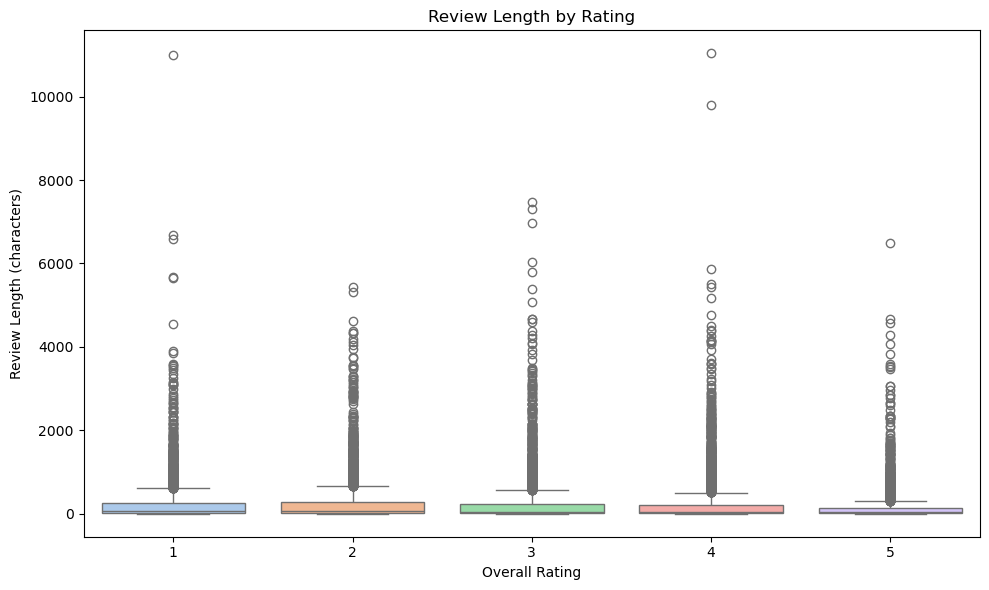

In [121]:
#  Review length vs rating
plt.figure(figsize=(10,6))
sns.boxplot(x='overall', y='review_length', data=df,hue='overall',palette='pastel',legend=False)
plt.title('Review Length by Rating')
plt.xlabel('Overall Rating')
plt.ylabel('Review Length (characters)')
plt.tight_layout()
plt.show()

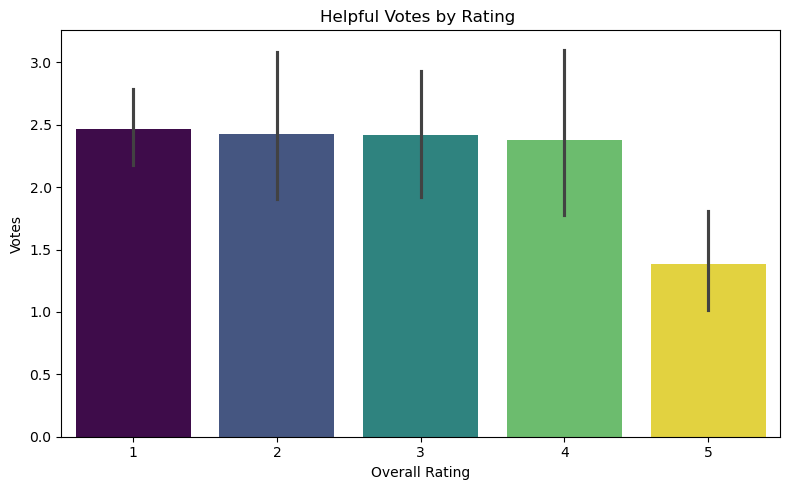

In [117]:
# Votes vs rating (boxplot) 
plt.figure(figsize=(8,5))
sns.barplot(x='overall', y='vote',hue='overall', data=df,palette='viridis',legend=False)
plt.title('Helpful Votes by Rating ')
plt.xlabel('Overall Rating')
plt.ylabel('Votes')
plt.tight_layout()
plt.show()

In [36]:
 #Grouped statistics: review_length by rating ---
rating_vs_length = df.groupby('overall')['review_length'].agg(
    ['mean', 'median', 'min', 'max', 'count']
)
print("Review length statistics by rating:")
print(rating_vs_length)

Review length statistics by rating:
               mean  median  min    max  count
overall                                       
1        233.384922    54.0    2  11004   4019
2        263.919763    55.0    1   5440   3876
3        256.514023    52.0    1   7469   3922
4        245.738734    46.0    1  11038   3950
5        151.658899    34.0    1   6484   4034


In [37]:
votes_vs_rating = df.groupby('overall')['vote'].agg(
    ['mean', 'median', 'min', 'max', 'count']
)
print("\nHelpful votes statistics by rating:")
print(votes_vs_rating)


Helpful votes statistics by rating:
             mean  median  min  max  count
overall                                   
1        2.462553     0.0    0  320   4019
2        2.428277     0.0    0  838   3876
3        2.416624     0.0    0  494   3922
4        2.378481     0.0    0  730   3950
5        1.387209     0.0    0  440   4034


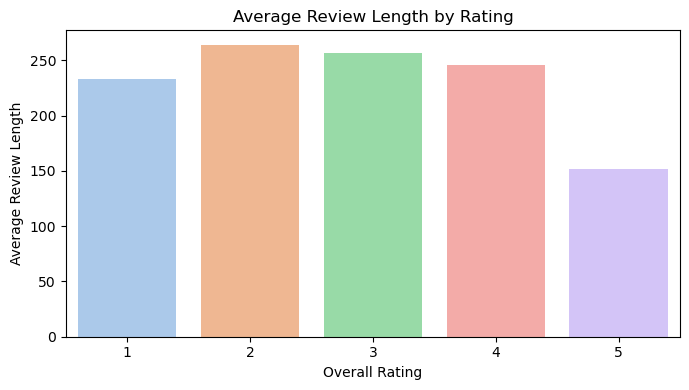

In [100]:
# Average review length & votes per rating 
plt.figure(figsize=(7,4))
sns.barplot(x=rating_vs_length.index, y=rating_vs_length['mean'],hue=rating_vs_length.index,palette='pastel',legend=False)
plt.title('Average Review Length by Rating')
plt.xlabel('Overall Rating')
plt.ylabel('Average Review Length')
plt.tight_layout()
plt.show()

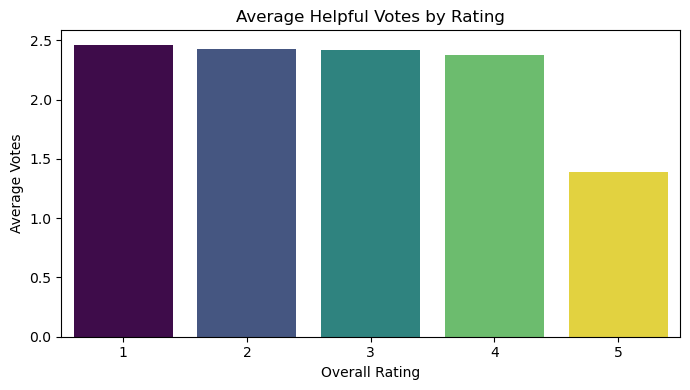

In [102]:
plt.figure(figsize=(7,4))
sns.barplot(x=votes_vs_rating.index, y=votes_vs_rating['mean'],hue=votes_vs_rating.index,palette='viridis',legend=False)
plt.title('Average Helpful Votes by Rating')
plt.xlabel('Overall Rating')
plt.ylabel('Average Votes')
plt.tight_layout()
plt.show()

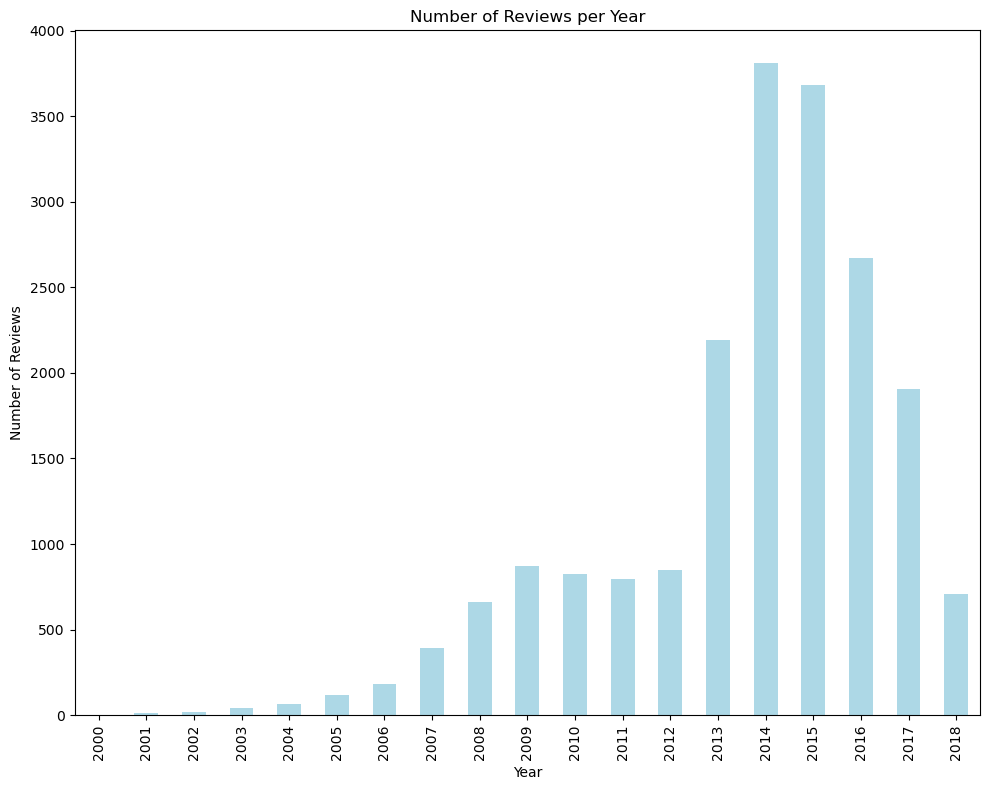

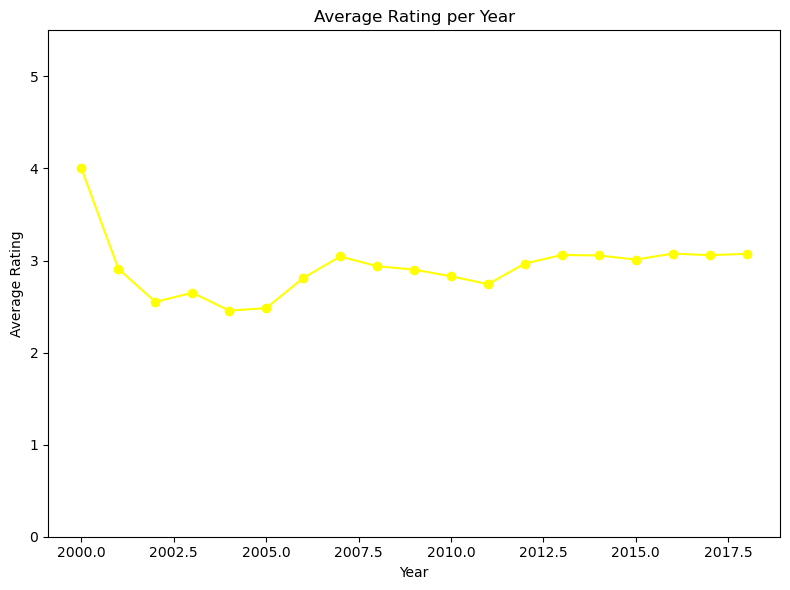

In [105]:
if df['review_year'].notna().any():
    reviews_per_year = df['review_year'].value_counts().sort_index()

    plt.figure(figsize=(10,8))
    reviews_per_year.plot(kind='bar',color="lightblue")
    plt.title('Number of Reviews per Year')
    plt.xlabel('Year')
    plt.ylabel('Number of Reviews')
    plt.tight_layout()
    plt.show()
     # Average rating per year
    rating_per_year = df.groupby('review_year')['overall'].mean()

    plt.figure(figsize=(8,6))
    rating_per_year.plot(marker='o',color='yellow')
    plt.title('Average Rating per Year')
    plt.xlabel('Year')
    plt.ylabel('Average Rating')
    plt.ylim(0, 5.5)
    plt.tight_layout()
    plt.show()
else:
    print("No valid review_time data available for time-based analysis.")

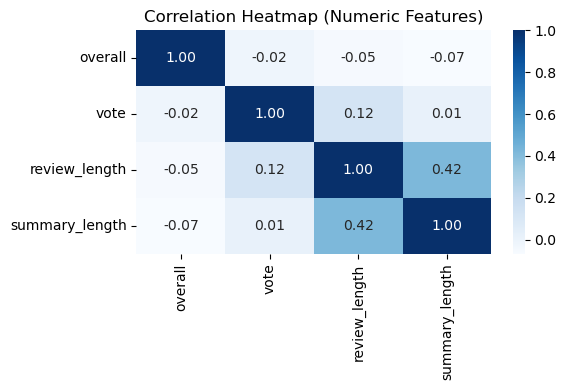

In [67]:
# 8. CORRELATION ANALYSIS
num_cols = ['overall', 'vote', 'review_length', 'summary_length']
num_cols = [c for c in num_cols if c in df.columns]

corr = df[num_cols].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="Blues")
plt.title('Correlation Heatmap (Numeric Features)')
plt.tight_layout()
plt.show()

In [52]:
all_reviews = " ".join(df['reviewText'].astype(str))
words = all_reviews.lower().split()
stopwords = ['the','and','is','it','to','for','a','an','of','in','this','that','with','on','was','as','but','are','so']

clean_words = [w for w in words if w not in stopwords and len(w) > 3]


In [53]:
from collections import Counter

word_counts = Counter(clean_words).most_common(20)
word_counts


[('have', 6118),
 ('they', 3372),
 ('good', 3077),
 ('very', 3058),
 ('just', 2843),
 ('would', 2725),
 ('from', 2702),
 ('when', 2602),
 ('great', 2490),
 ("it's", 2379),
 ('will', 2367),
 ('like', 2358),
 ('these', 2194),
 ('only', 1997),
 ('your', 1983),
 ('than', 1974),
 ('works', 1928),
 ('more', 1876),
 ('work', 1786),
 ('after', 1774)]

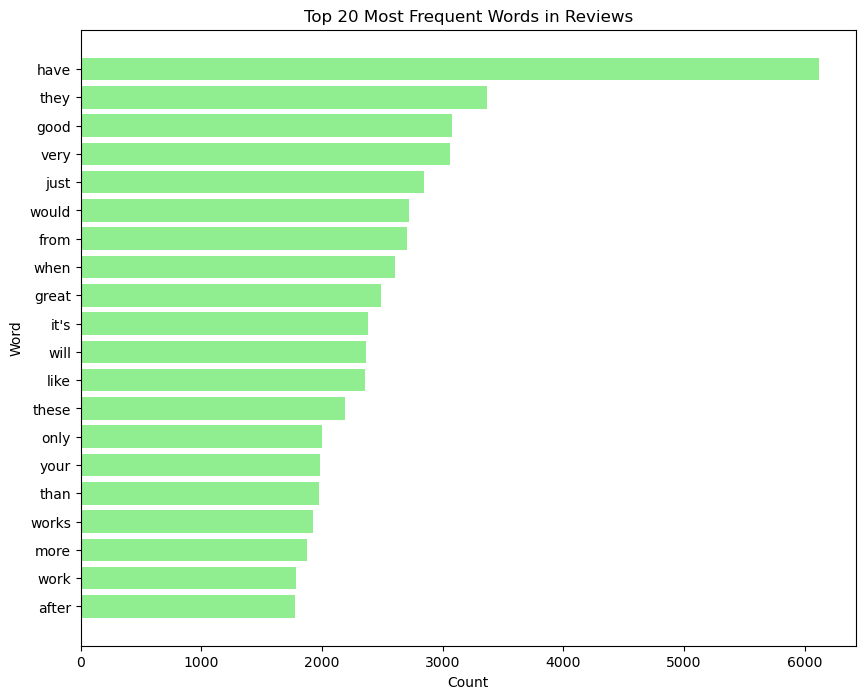

In [116]:
words = [w[0] for w in word_counts]
counts = [w[1] for w in word_counts]

plt.figure(figsize=(10,8))
plt.barh(words[::-1], counts[::-1],color='lightgreen')
plt.title("Top 20 Most Frequent Words in Reviews")
plt.xlabel("Count")
plt.ylabel("Word")
plt.show()


# Data Issues Detected
- **Missing values:** Initially present in `reviewText`.  
- **Duplicates:** Some repeated reviews were found and removed.
- **Outliers:**
  - Votes: A few reviews have very high vote counts.
  - Review length: Extremely long reviews; distributions were clipped at the 99th percentile for plotting.

These issues were handled during cleaning to make the EDA results more reliable.
